# Aula 1 - Análise dos dados

### Fonte: https://www.kaggle.com/c/lish-moa/code

### Conectando-se aos dados utilizando a biblioteca pandas
Os dados estão no formato zip, por isso é necessário usar a opção compression="zip" para descompactar antes de usar. Como o separador é vírgula não foi necessário definir explicitamenteo formato do csv. Em alguns casos pode ser necessário definir o separador ou a codigicação da página como por exemplo neste arquivo:

url_dados = "https://bi.s3.es.gov.br/covid19/MICRODADOS.csv"

dados = pd.read_csv(url_dados, sep=";", encoding="latin1")

In [1]:
import pandas as pd
url_dados = "https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true"
dados = pd.read_csv(url_dados, compression='zip')

### Funções para iniciar a exploração dos dados
Essas funções servem para dar uma ideia de como é o esquema de dados e as características dos valores
É uma análise das primeiras impressões, por alto, macro sobre com quais dados estamos trabalhando

In [2]:
dados.head(3) # Apresenta as 3 primeiras linhas da tabela dados (dataframe pandas). Serve para dar uma visão geral.
# dados.info() # Apresenta a quantidade de linhas e colunas e a quantidade de colunas com cada tipo de dados. Dá uma visão do esquema.
# dados.shape # Apresenta de forma resumida e rápida o tamanho da tabela com o número de linhas e colunas.
# dados.tail(3) # Similar a head, mas apresenta as últimas linhas
# dados[-5:] # retorna a mesma coisa que tail(5)

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931


### Analisando valores únicos de algumas colunas
Esse processo de análise ajuda a endender o conteúdo das colunas

In [3]:
# unique: lista os valores distintos de uma coluna
# value_counts: Total de linhas para cada valor distinto da coluna
# describe: detalhas os minimos, máximos, quartis para ter uma visão da distribuição estatistica em colunas numéricas

## TRATAMENTO ##
# dados["tratamento"].unique() # Com Droga (algum farmaco utilizado), Com Controle (Nenhum farmaco usado - grupo controle)
# dados["tratamento"].value_counts(normalize=True).map("{:.1%}".format) # Mais de 92% são de experimentos com droga. Grupo controle pequeno
# dados["tratamento"].describe() # Mais de 23 mil registros

## TEMPO ##
# dados["tempo"].unique() # Representa o tempo das doses do experimento (24h, 72h, 48h)
# dados["tempo"].value_counts(normalize=True).map("{:.1%}".format) # a distribuição está equilibrada, aproximadamente 1/3 para cada tempo

## DOSE ##
# dados["dose"].unique() # Doses D1 (experimento com uma dose) e D2 (experimento com duas dose)
# dados["dose"].value_counts(normalize=True).map("{:.1%}".format) # Proporção equilibrada D1 - 51.0%
# dados["dose"].describe()

## DROGA (composto) ##
# dados["droga"].unique() # Os nomes estão anonimizados e a quantidade de valores únicos é grande
# dados["droga"].unique().shape[0] # Shape por padrão retorna linhas e colunas para retornar apenas linhas shape[0]
# dados["droga"].values # retorma a mesma coisa que unique
dados["droga"].value_counts(normalize=True).map("{:.1%}".format) # O composto com maior quantidade de experimentos tem 1866
# dados["droga"].describe() # Existe 3289 tipos de drogas/composto diferentes

cacb2b860    7.8%
87d714366    3.0%
9f80f3f77    1.0%
8b87a7a83    0.9%
5628cb3ee    0.8%
             ... 
2b06f0b4b    0.0%
dd4a96d16    0.0%
828099693    0.0%
627d2d158    0.0%
89ced6383    0.0%
Name: droga, Length: 3289, dtype: object

### Top 10 Compostos - Analisando valores distintos em formato gráfico
Será usado no início o gráfico padrão do pandas. Mais a frente serão usados gráficos mais específicos com a biblioteca seaborn


<AxesSubplot:>

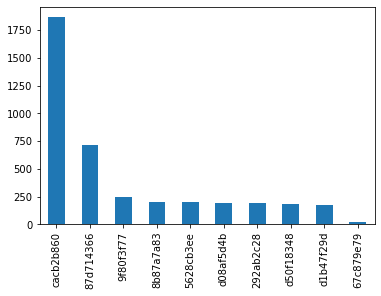

In [4]:
# Para estas 3 primeiras colunas podemos plotar o gráfico sem problemas porque elas tem poucos valores únicos
# dados["tratamento"].value_counts(normalize=True).plot.bar()
# dados["tempo"].value_counts().plot.bar()
# dados["dose"].value_counts().plot.bar()

# Para a coluna DROGA não podemos plotar direto porque ela tem mais de 3mil valores únicos, temos que pegar um Top 10 por exemplo
# Selecionando os Top 10 drogas (somente os códigos) e armazenando em uma lista
dados_top10_drogas = dados["droga"].value_counts().index[0:10] # O index do value_counts é o nome da droga
# dados_top10_drogas.unique()

# Filtrando o dataframe usando a lista de códigos dos top 10 compostos. @ arroba identifica que é uma lista criada internamente
# Busca dentro da tabela dados apenas os experimentos que existem na lista dados_top10_drogas
dados.query("droga in @dados_top10_drogas")["droga"].value_counts().plot.bar()


### Filtrando Linhas. Colunas: Analisando as colunas numéricas g-0 até g-771
As colunas g-N representam expressões gênicas, os valores representam alterações nessas expressões

In [5]:
# g é abreviação de gene. representa a expressão desse gene
dados["g-0"].describe() # os quartis demotram grande concentração em torno de zero

# 1-Identificar os experimentos que a expressão genica g-0 estão acima de 2. 
# Função loc do pandas aceita condições nas linhas e nas colunas
dados_filtrados = dados.loc[dados["g-0"] > 2]
# dos 23mil experimentos 1609 estão acima de 2. Os valores parecem estar concentrados em torno de zero
dados_filtrados["g-0"].count()

# Um subconjunto das colunas g (colunas g de 1 a 10)
dados.loc[:, "g-0": "g-10"]
# Usando o iloc podemos obter as colunas g-0 até g-10 usando os índices delas que iniciam em zero neste caso 6 até 16
# dados.iloc[:, 6:16]

,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10
0,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830
1,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520
2,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797
3,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269
4,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219
...,...,...,...,...,...,...,...,...,...,...,...
23809,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,0.7201,0.5773,0.3055,-0.4726,0.1269,0.2531
23810,-1.3260,0.3478,-0.3743,0.9905,-0.7178,0.6621,-0.2252,-0.5565,0.5112,0.6727,-0.1851
23811,0.3942,0.3756,0.3109,-0.7389,0.5505,-0.0159,-0.2541,0.1745,-0.0340,0.4865,-0.1854
23812,0.6660,0.2324,0.4392,0.2044,0.8531,-0.0343,0.0323,0.0463,0.4299,-0.7985,0.5742


### Desafios aula 1
#### Investigar por que a classe tratamento é tão desbalanceada?
- Dependendo o tipo de pesquisa é possível usar o mesmo controle para mais de um caso. Repare que o grupo de controle é um grupo onde não estamos aplicando o efeito de uma determinada droga. Então, esse mesmo grupo pode ser utilizado como controle para cada uma das drogas estudadas.


In [6]:
# método query https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.query.html

# print("Total de dados: {0}".format(len(dados["id"])))
print("Total de dados: {0}".format(dados["id"].count()))
print("Quantidade de drogas {0}".format(len(dados.groupby(["droga", "tratamento"]).count()["id"])))

# Filtrar apenas as linhas com o tratamento "com_controle" e contar quantas linhas existe para cada tipo de droga
# Descobrimos que existe apenas um tipo de droga para o grupo controle "placebo"
display(dados.query('tratamento == "com_controle"').value_counts('droga'))

Total de dados: 23814
Quantidade de drogas 3289


droga
cacb2b860    1866
dtype: int64

### Renomeando Colunas - colunas que possuem hifen no nome


In [7]:
# Renomeando todas as colunas que tem hifen no nome
nome_colunas = dados.columns

# Iterando nas colunas e alterando o nome
novo_nome_coluna = []
""""
for coluna in nome_colunas:
    coluna = coluna.replace('-', '_')
    novo_nome_coluna.append(coluna)
"""
# Usando list comprerension
novo_nome_coluna = [coluna.replace("-", "_") for coluna in nome_colunas] # if coluna.count("-") > 0]

# display(novo_nome_coluna)
# display(dados.columns)
dados.columns = novo_nome_coluna
dados.head()


,id,tratamento,tempo,dose,droga,g_0,g_1,g_2,g_3,g_4,...,c_90,c_91,c_92,c_93,c_94,c_95,c_96,c_97,c_98,c_99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,...,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,...,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


### Filtro: Diferentes formas de filtragem. Usando pandas ou query()

In [8]:
# Comparando formas de filtragem
dados_filtrados = dados[dados['g_0'] > 0]
dados_filtrados.head()

dados_filtrados2 = dados.query('g_0 > 0')
dados_filtrados2.head()

,id,tratamento,tempo,dose,droga,g_0,g_1,g_2,g_3,g_4,...,c_90,c_91,c_92,c_93,c_94,c_95,c_96,c_97,c_98,c_99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
6,id_001bd861f,com_droga,24,D2,746ca1f5a,2.0440,1.7000,-1.5390,5.9440,-2.1670,...,0.1855,1.1720,0.8325,0.6486,0.8090,1.5880,2.4670,0.0357,0.1351,-0.3179
7,id_0020d0484,com_droga,48,D1,8b87a7a83,0.2711,0.5133,-0.1327,2.5950,0.6980,...,0.3230,-0.4140,0.2532,0.0513,0.8600,1.4250,0.6633,0.4562,-0.9622,0.0260


### Aula 2 - Estatísticas e distribuição dos dados
Agora vamos detalhar a base e identificar as distribuições estatíticas das principais colunas.

#### Renomeando Colunas

In [9]:
# Alterar o nome da coluna "droga" para "composto" (droga na verdade é composto quimico e não um remedio específico)
# criar um dict para ser usado com parametro para rename
mapa = {"droga": "composto"}

# inplace = true substitui o nome da coluna, se não o nome se mantém
# tem que trocar todo os códigos das etapas anteriores precisam ser alterados se for usado inplace
dados.rename(columns=mapa, inplace=True)

### Filtrando Top 5

In [10]:
# Amostra dos top 5 compostos com maior quantidade de experimentos
dados_top5_compostos = dados["composto"].value_counts().index[0:5] # index representa dos compostos

# Filtrando os experimentos que foram feitos com os top 5 compostos. Aplica a lista como filtro na coluna composto 
# Atenção!: precisa inserir o "@ arroba" no nome da lista dados_top5_compostos. Ele identifica que é uma lista criada internamente
dados.query("composto in @dados_top5_compostos") 

,id,tratamento,tempo,dose,composto,g_0,g_1,g_2,g_3,g_4,...,c_90,c_91,c_92,c_93,c_94,c_95,c_96,c_97,c_98,c_99
7,id_0020d0484,com_droga,48,D1,8b87a7a83,0.2711,0.5133,-0.1327,2.5950,0.6980,...,0.3230,-0.4140,0.2532,0.0513,0.8600,1.4250,0.6633,0.4562,-0.9622,0.0260
16,id_002fb9c19,com_droga,48,D1,87d714366,8.7380,0.1914,2.4380,-0.2930,3.2010,...,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-6.7840
25,id_0054388ec,com_controle,48,D1,cacb2b860,-0.6696,-0.2718,-1.2230,-0.6226,-0.7220,...,0.6171,0.6405,0.5429,0.3562,1.3290,0.5573,0.8837,0.5534,0.8976,1.0050
38,id_0079af0fb,com_controle,24,D1,cacb2b860,-0.1636,-1.8230,-0.5211,0.3054,-1.1280,...,-0.3880,-0.6828,-0.6594,-0.2043,0.3571,-0.1319,0.2187,0.0737,0.6498,-1.4820
40,id_007bfbb91,com_controle,24,D2,cacb2b860,-1.3200,-1.7340,-0.0741,1.5440,-1.8290,...,0.7412,1.0340,0.7393,1.1020,0.3786,0.2636,-0.5751,0.3362,0.8543,0.9180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23793,id_ffd26f361,com_controle,48,D2,cacb2b860,0.6008,0.2781,-0.3319,-0.8782,0.9281,...,1.2470,0.9569,-0.2065,-0.4918,0.7863,0.0504,0.8813,0.7757,-0.5272,0.7082
23802,id_fff3976bd,com_droga,24,D1,87d714366,3.2890,2.1270,0.9770,2.0490,2.3170,...,-8.6300,-8.1490,-6.2900,-8.0970,-8.7330,-2.3780,-8.4480,-4.4550,-5.7930,-3.7000
23805,id_fff6df1c5,com_droga,48,D2,5628cb3ee,1.7380,-1.2900,-0.4533,-1.1640,-0.4841,...,0.2865,0.5974,-0.2727,0.1188,1.0770,-1.0250,0.1516,0.4503,-0.6312,-0.8302
23811,id_fffc1c3f4,com_controle,48,D2,cacb2b860,0.3942,0.3756,0.3109,-0.7389,0.5505,...,0.5409,0.3755,0.7343,0.2807,0.4116,0.6422,0.2256,0.7592,0.6656,0.3808


### Distribuição das colunas discretas
- Gráfico seaborn - countplot: Contagem simples por categoria

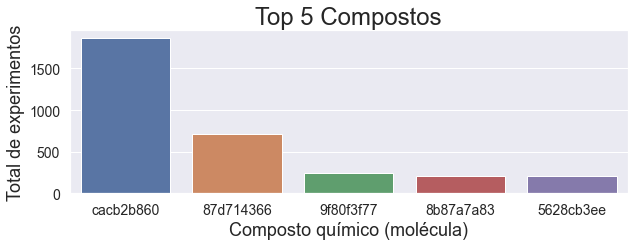

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# preconfigura os graficos do seaborn
sns.set()
plt.rc("axes", titlesize=24)
plt.rc("axes", labelsize=18)
plt.rc("xtick", labelsize=14)
plt.rc("ytick", labelsize=14)
plt.figure(figsize=(10, 3))

# Gráfico: Compostos
ax1 = sns.countplot(
         x="composto", 
         data=dados.query("composto in @dados_top5_compostos"),
         order=dados_top5_compostos
     )      
ax1.set_title("Top 5 Compostos")
ax1.set_ylabel("Total de experimentos")
ax1.set_xlabel("Composto químico (molécula)")

plt.show()

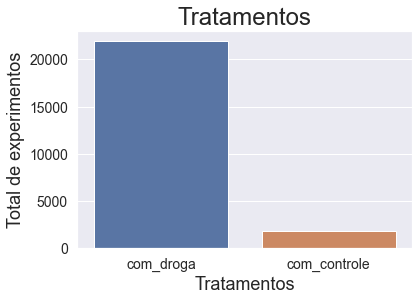

In [12]:
# Gráfico: Tratamentos
ax2 = sns.countplot(
         x="tratamento", 
         data=dados        
     )      
ax2.set_title("Tratamentos")
ax2.set_ylabel("Total de experimentos")
ax2.set_xlabel("Tratamentos")

plt.show()

### Distribuição das Colunas Numéricas (medidas)
Vamos verificar a distribuição das colunas com dados contínuos. Para isso precisamos criar buckts (bins)

In [13]:
# quantos elementos únicos tem a coluna g-0?
# Parece ser um valor contínuo
len(dados["g_0"].unique())

14367

In [14]:
# Maiores e menores valores da distribuição
print("Menor: {0}".format(dados["g_0"].min()))
print("Maior: {0}".format(dados["g_0"].max()))

# dados.describe()

# conjunto de estatísticas da tabela ou de uma coluna específica
# Distribuição das 3 colunas
# dados[["g_0", "g_1", "g_2"]].describe()
dados.loc[:, "g_0":"g_10"].describe()
# dados.iloc[:, 6:16].describe()

Menor: -5.513
Maior: 10.0


,g_0,g_1,g_2,g_3,g_4,g_5,g_6,g_7,g_8,g_9,g_10
count,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000
mean,0.248366,-0.095684,0.152253,0.081971,0.057347,-0.138836,0.035961,-0.202651,-0.190083,0.119905,-0.123321
std,1.393399,0.812363,1.035731,0.950012,1.032091,1.179388,0.882395,1.125494,1.749885,1.087180,1.291501
min,-5.513000,-5.737000,-9.104000,-5.998000,-6.369000,-10.000000,-10.000000,-10.000000,-10.000000,-8.337000,-10.000000
25%,-0.473075,-0.562200,-0.437750,-0.429575,-0.470925,-0.602225,-0.493900,-0.525175,-0.511675,-0.360200,-0.511475
50%,-0.008850,-0.046600,0.075200,0.008050,-0.026900,-0.015650,-0.000650,-0.017900,0.010000,0.160450,0.038550
75%,0.525700,0.403075,0.663925,0.463400,0.465375,0.510425,0.528725,0.411900,0.549225,0.697775,0.525400
max,10.000000,5.039000,8.257000,10.000000,10.000000,7.282000,7.333000,5.473000,8.887000,6.433000,10.000000


#### Visualização gráfica da distribuição de uma medida

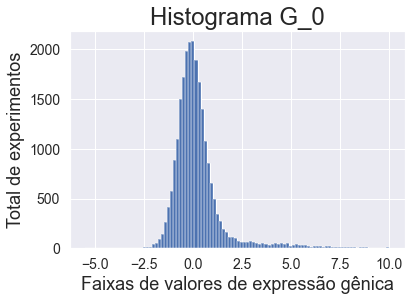

In [15]:
# apresentar em um histograma com 100 faixas de valores no eixo X

# Versão do gráfico usando versão padrão do pandas. bins representa o numero de faixas que serão criadas para categorizar os valores contínuos
dados["g_0"].hist(bins=100)

# Versão usando seaborn: histplot
ax = sns.histplot(data=dados["g_0"], bins=100)
ax.set_title("Histograma G_0")
ax.set_ylabel("Total de experimentos")
ax.set_xlabel("Faixas de valores de expressão gênica")
plt.show()

In [16]:
# todas as linhas com todas as colunas a partir da g_0 até g_771
# usar T no final transforma linhas em colunas
dados_hist = dados.loc[:,'g_0':'g_771'].describe().T
dados_hist

,count,mean,std,min,25%,50%,75%,max
g_0,23814.0,0.248366,1.393399,-5.513,-0.473075,-0.00885,0.525700,10.000
g_1,23814.0,-0.095684,0.812363,-5.737,-0.562200,-0.04660,0.403075,5.039
g_2,23814.0,0.152253,1.035731,-9.104,-0.437750,0.07520,0.663925,8.257
g_3,23814.0,0.081971,0.950012,-5.998,-0.429575,0.00805,0.463400,10.000
g_4,23814.0,0.057347,1.032091,-6.369,-0.470925,-0.02690,0.465375,10.000
...,...,...,...,...,...,...,...,...
g_767,23814.0,-0.076251,1.115477,-10.000,-0.506200,0.00990,0.511175,6.317
g_768,23814.0,0.134162,0.951264,-4.269,-0.353100,0.00540,0.409075,10.000
g_769,23814.0,-0.128018,1.230636,-10.000,-0.544600,0.00060,0.498500,5.911
g_770,23814.0,-0.219210,1.326193,-10.000,-0.554400,0.02870,0.496400,10.000


<AxesSubplot:>

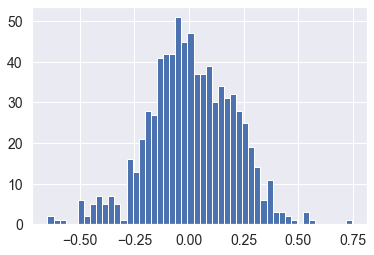

In [17]:
# plotar histograma com as médias de todas as colunas
dados_hist["mean"].hist(bins=50)

<AxesSubplot:>

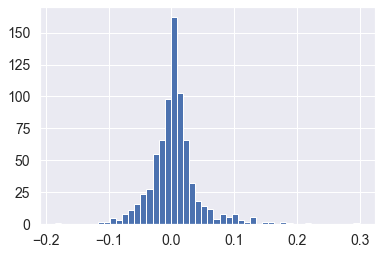

In [18]:
# plotar histograma com as medianas 2º quartil de todas as colunas
dados_hist["50%"].hist(bins=50)

### Analisando conjunto de medidas (colunas) de tipos celulares

<AxesSubplot:>

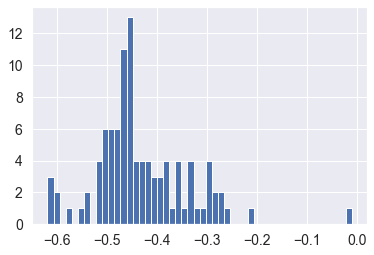

In [19]:
# Analise da distribuição das médias de todas as linhas com todas as colunas a partir da c_0 até c_99 (tipos celulares)
# usar T no final transforma linhas em colunas
# dados.loc[:,'c_0':'c_99'].describe().T
dados.loc[:,'c_0':'c_99'].describe().T['mean'].hist(bins=50)


#### Usando gráficos boxsplot

<AxesSubplot:xlabel='g_0'>

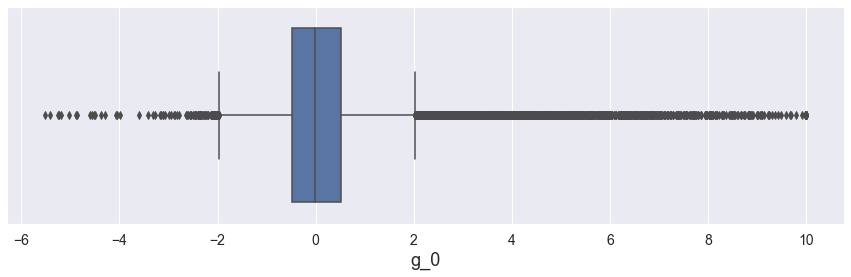

In [20]:
# metade estão acima de zero e outra metade abaixo de zero
# a caixa azul representa a mediana e o primeiro quartil a direita e o 1 quartil a esquerda. Representa 50% dos casos
# os pontos do lado de fora são os outliers (fojem do padrão)
# o traço externo representa os outros 25% de cada lado
plt.figure(figsize=(15,4))
sns.boxplot(x="g_0", data=dados)

<AxesSubplot:xlabel='g_100', ylabel='tratamento'>

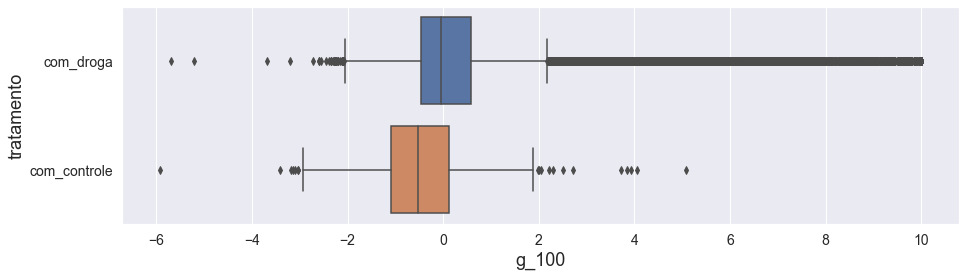

In [21]:
plt.figure(figsize=(15,4))
sns.boxplot(y="tratamento", x="g_100", data=dados)

<AxesSubplot:xlabel='g_0', ylabel='dose'>

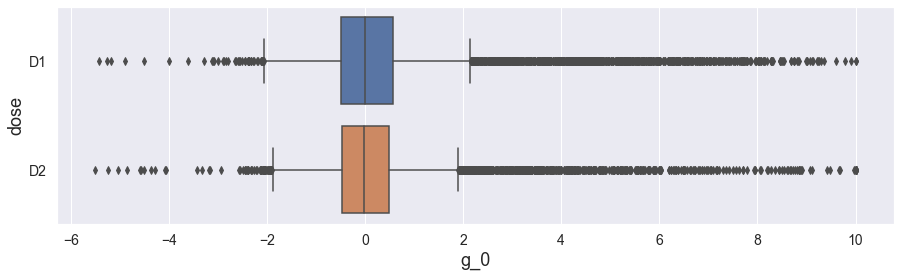

In [22]:
plt.figure(figsize=(15,4))
sns.boxplot(y='dose', x='g_0' , data=dados)

## Desafios Aula 2

In [23]:
# Melhorar a visualização do gráfico


## Aula 3 - Corelações e causalidade

In [24]:
# Relacionando os tipos de tratamento, tempo, dose
# Dados categóricos: tratamento, tempo, dose
# Ver as proporções (com e sem droga)

# Criar uma tabela de frequencia https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html?highlight=frequence%20table%20pandas%20crosstab
# Quantidade de experimentos por tipo de dose e tempo
pd.crosstab(dados["dose"], dados["tempo"])

tempo,24,48,72
dose,,,
D1,3886,4354,3907
D2,3886,3896,3885


In [25]:
# Crosstab com "Dose" e "Tempo" nas linhas e "Tratamento"
# os totais representam por padrão a quandidade de registros da tabela entro de cada céluna
pd.crosstab([dados["dose"], dados["tempo"]], dados["tratamento"])

tratamento  com_controle  com_droga
dose tempo                         
D1   24              301       3585
     48              343       4011
     72              307       3600
D2   24              305       3581
     48              305       3591
     72              305       3580

In [26]:
# Visualizando em percentual, normalizando pelas linhas
# A opção normalize index faz a proporção levando em conta o índice dose[D1] e tempo[24] (subtotal da linha) por exemplo e não da tabela como um todo
pd.crosstab([dados["dose"], dados["tempo"]], dados["tratamento"], normalize='index') # se normalize for igual a True o percentual será sob o total da tabela toda

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.077458   0.922542
     48         0.078778   0.921222
     72         0.078577   0.921423
D2   24         0.078487   0.921513
     48         0.078285   0.921715
     72         0.078507   0.921493

In [27]:
# Normalizando pelas colunas
pd.crosstab([dados["dose"], dados["tempo"]], dados["tratamento"], normalize='columns')

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.161308   0.163341
     48         0.183816   0.182750
     72         0.164523   0.164024
D2   24         0.163451   0.163158
     48         0.163451   0.163614
     72         0.163451   0.163113

In [28]:
# Usando o parametro values para analisar uma medida específica.
# Quando não informa o parametro values a contagem padrão é a quantidade de registros

# Valor médio (mean) da coluna g_0
pd.crosstab([dados["dose"], dados["tempo"]], dados["tratamento"], values=dados["g_0"], aggfunc="mean")

# Dá para perceber a variação entre as médias de quando o tratamento usa a droga
# Mas não dá para afirmar nada porque a média pode ser tendenciosa por ter outliers
# Temos que fazer uma análise de variância e ver como os valores estão distribuidos em torno da média

tratamento  com_controle  com_droga
dose tempo                         
D1   24        -0.251760   0.367996
     48        -0.122773   0.412469
     72        -0.295271   0.286250
D2   24         0.010754   0.115253
     48         0.013174   0.214480
     72         0.070250   0.253439

In [29]:
# Desafios:
# Fazer a tabela de cima usando groupby
# Explorar uma alternativa com crosstab usando o melt
# https://pandas.pydata.org/docs/reference/api/pandas.melt.html?highlight=melt#pandas.melt

### Analisar relação entre medidas

<AxesSubplot:xlabel='g_0', ylabel='g_3'>

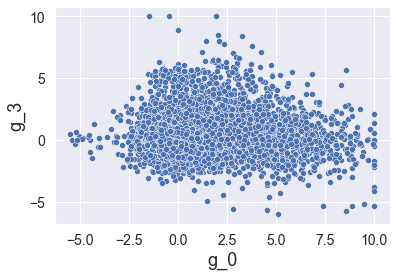

In [30]:
# Analisar a relação entre g_0 e g_3 ...(olhando como um todo, sem um filtro de composto ou de tratamento)
sns.scatterplot(x="g_0", y="g_3", data=dados)

# não tem padrão evidente, nem positivo nem negativo

<AxesSubplot:xlabel='g_0', ylabel='g_8'>

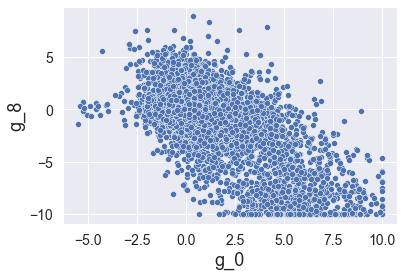

In [31]:
# A inclinação negativa: Quant0 maior o G-0 menor o G-8
sns.scatterplot(x="g_0", y="g_8", data=dados)

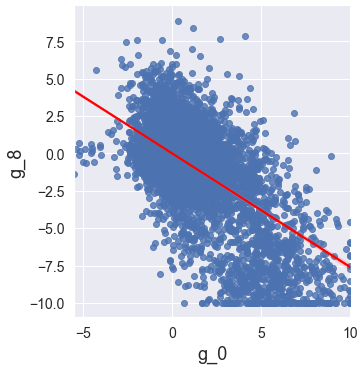

In [32]:
# Adiciona linha de tendencia (tendencia negativa)
sns.lmplot(x="g_0", y="g_8", data=dados, line_kws={"color": "red"})

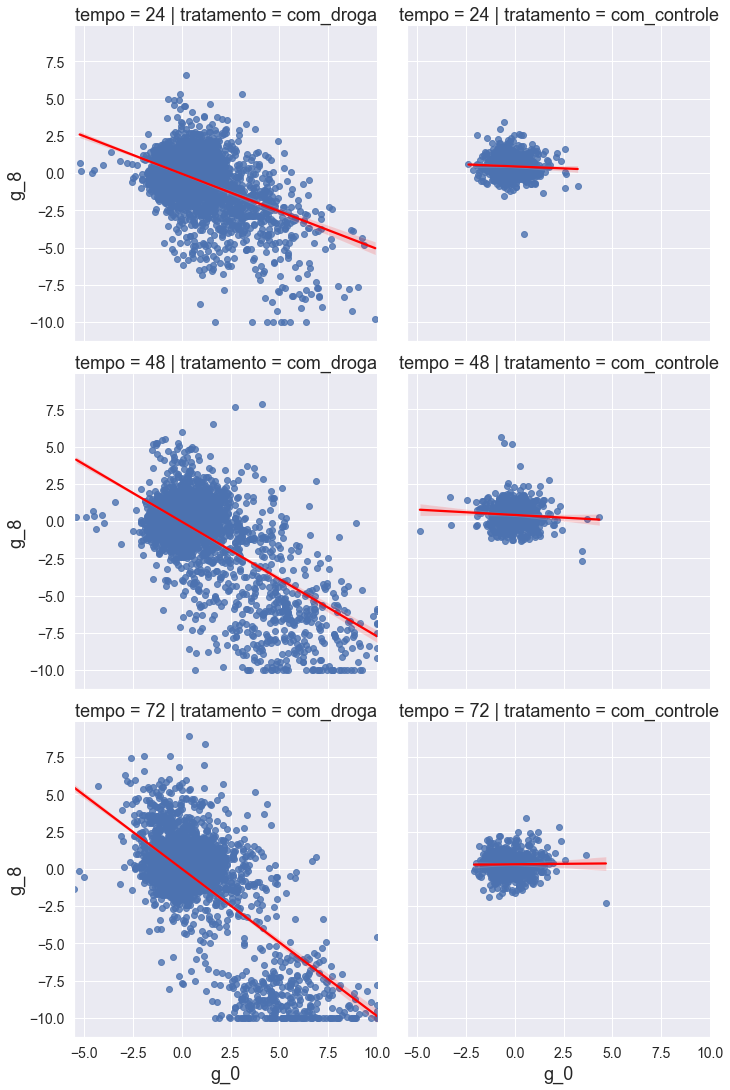

In [33]:
# Começar analisar a relação com alguns filtros aplicados para dar foco em um tratamento, dose, tempo...

# Relação entre o g_0 e o g_8 com tempos e tratamentos diferentes
sns.lmplot(data=dados, x="g_0", y="g_8", col="tratamento", row="tempo", line_kws={"color": "red"} )

# O tratamento com controle não apresenta corelação. Isso é esperado porque foi usado um composto inerte

### Correlacionando
##### Correlação não implica em causalidade:
Não podemos afirmar que um está afentando diretamente o outro. Pode ser que sim, mas também pode ser que não. Uma corelação pode ser uma causalidade, não necessáriamente o aumento de um tem a haver com aumento de outro, pode ser algo indireto, efetado por outro parametro mas que gerou esse padrão.

Ex:no caso desse exemplo. Os genes que naturalmente aumentam a expressão juntos, como os genes relacionados ao metabolismo, aumentam depois do almoço, não porque um influencia o outro, mas porque existe a necessidade de metabolizar o almoço naquele momento e isso é feito em conjunto por todos os genes.

https://www.tylervigen.com/spurious-correlations


In [34]:
# Calculando a correlação de todos os genes
# Para cada coluna, uma colação que varia de -1 a +1 sendo que valores negativos 
# indica que o aumento de um implica a redução do outro (inversamente relacionados)
# próximo 1 são proporcionalmente relacionados

dados.loc[:, "g_0":"g_771"].corr()

,g_0,g_1,g_2,g_3,g_4,g_5,g_6,g_7,g_8,g_9,...,g_762,g_763,g_764,g_765,g_766,g_767,g_768,g_769,g_770,g_771
g_0,1.000000,0.086032,0.176188,0.011266,0.403153,-0.165478,0.238348,-0.374451,-0.604212,-0.428779,...,0.005085,-0.239410,0.548401,0.425222,-0.308095,-0.052622,0.300241,-0.127375,-0.514201,0.405908
g_1,0.086032,1.000000,-0.054518,-0.027855,0.193647,-0.151590,-0.122541,0.144537,-0.009973,-0.047558,...,-0.205998,0.060051,0.115071,0.160140,0.015098,-0.003378,-0.030756,-0.006866,-0.095108,-0.032233
g_2,0.176188,-0.054518,1.000000,0.042633,0.013968,0.018516,0.015190,-0.144205,-0.128029,-0.081332,...,0.090115,-0.055655,0.138085,0.061574,-0.093631,-0.053149,0.115415,0.014489,-0.078661,0.103985
g_3,0.011266,-0.027855,0.042633,1.000000,-0.033039,0.042231,-0.043177,-0.175692,-0.086167,-0.014052,...,0.075982,0.178422,0.016467,-0.089317,-0.166426,-0.179370,0.028452,-0.206077,-0.002142,0.058219
g_4,0.403153,0.193647,0.013968,-0.033039,1.000000,-0.057449,0.206405,-0.032748,-0.474828,-0.274167,...,-0.023752,-0.164868,0.404440,0.317500,-0.225094,0.124425,0.115579,-0.172727,-0.363673,0.250713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
g_767,-0.052622,-0.003378,-0.053149,-0.179370,0.124425,-0.081016,-0.000886,0.137336,-0.101191,-0.013157,...,-0.010391,-0.180252,0.003976,-0.027425,0.153722,1.000000,-0.048393,0.065450,0.008603,-0.001136
g_768,0.300241,-0.030756,0.115415,0.028452,0.115579,-0.139000,-0.005791,-0.419437,-0.209968,-0.291836,...,0.077292,0.000048,0.403211,0.241509,-0.250512,-0.048393,1.000000,0.079364,-0.382607,0.351651
g_769,-0.127375,-0.006866,0.014489,-0.206077,-0.172727,-0.068537,-0.278587,-0.082554,0.268571,0.037013,...,0.020662,0.071082,0.013235,0.021152,0.151940,0.065450,0.079364,1.000000,0.135853,-0.083713
g_770,-0.514201,-0.095108,-0.078661,-0.002142,-0.363673,0.144631,-0.143428,0.402451,0.441011,0.415967,...,0.014331,-0.010849,-0.498222,-0.489116,0.284882,0.008603,-0.382607,0.135853,1.000000,-0.425063


#### Código de exemplo para criar um gráfico de correlação com muitas colunas ao mesmo tempo

<AxesSubplot:>

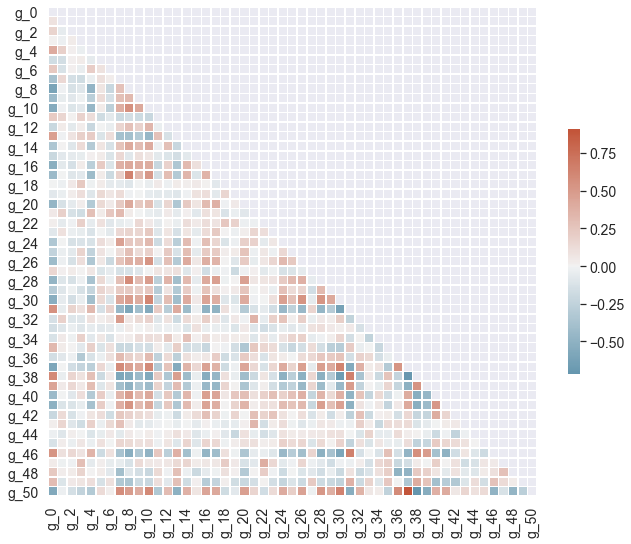

In [35]:
# Site fonte: https://seaborn.pydata.org/examples/many_pairwise_correlations.html
    
import numpy as np
import matplotlib.pyplot as plt

# Passando um subconjunto de colunas
corr = dados.loc[:, "g_0":"g_50"].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio. 
# O exemplo do site foi alterado para remover o limite máximo
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

<AxesSubplot:>

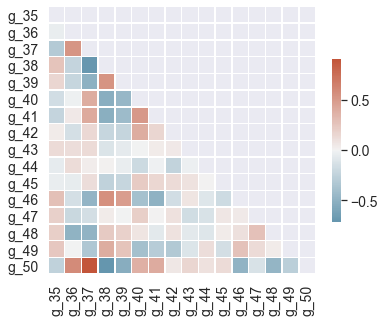

In [36]:
# Ajustar para ver uma janela menor para dar um zoom em alguns pontos que chamam a atenção como entre g_35 e g_50
# Existe uma relação forte no g_50 com g_37
corr = dados.loc[:, "g_35":"g_50"].corr()

mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(6, 6))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [37]:
# uma corelaçãço de 0.907061
dados.loc[:, "g_35":"g_50"].corr()

,g_35,g_36,g_37,g_38,g_39,g_40,g_41,g_42,g_43,g_44,g_45,g_46,g_47,g_48,g_49,g_50
g_35,1.000000,-0.037672,-0.308992,0.264955,0.159648,-0.162449,-0.231203,0.036540,0.133641,-0.051174,-0.039887,0.280881,0.196919,0.197952,0.244101,-0.251695
g_36,-0.037672,1.000000,0.530795,-0.227730,-0.217075,-0.012009,0.055018,-0.143670,0.119093,0.127624,-0.047447,-0.140867,-0.197582,-0.486942,-0.001031,0.587005
g_37,-0.308992,0.530795,1.000000,-0.704836,-0.501480,0.398989,0.418260,0.145261,0.127756,0.032476,0.115128,-0.479877,-0.148202,-0.484635,-0.338690,0.907061
g_38,0.264955,-0.227730,-0.704836,1.000000,0.541459,-0.527399,-0.520954,-0.215705,-0.112496,0.012677,-0.250440,0.562659,0.038034,0.233732,0.398541,-0.714947
g_39,0.159648,-0.217075,-0.501480,0.541459,1.000000,-0.456063,-0.427049,-0.224381,-0.060103,-0.042507,-0.216778,0.482675,-0.002309,0.188645,0.265437,-0.533741
g_40,-0.162449,-0.012009,0.398989,-0.527399,-0.456063,1.000000,0.512243,0.395169,0.000942,-0.186638,0.223448,-0.380471,0.202307,0.073462,-0.388199,0.380612
g_41,-0.231203,0.055018,0.418260,-0.520954,-0.427049,0.512243,1.000000,0.155136,0.032897,-0.007711,0.149769,-0.494920,0.006772,-0.066663,-0.290614,0.407756
g_42,0.036540,-0.143670,0.145261,-0.215705,-0.224381,0.395169,0.155136,1.000000,0.057617,-0.233770,0.131999,-0.162035,0.093882,0.086623,-0.320365,0.060542
g_43,0.133641,0.119093,0.127756,-0.112496,-0.060103,0.000942,0.032897,0.057617,1.000000,-0.023568,0.083707,0.071613,-0.163788,-0.066321,-0.102816,0.163383
g_44,-0.051174,0.127624,0.032476,0.012677,-0.042507,-0.186638,-0.007711,-0.233770,-0.023568,1.000000,0.004279,-0.097154,-0.121546,-0.096411,0.117875,0.092644


### Analisando correlação da viabilidade celular

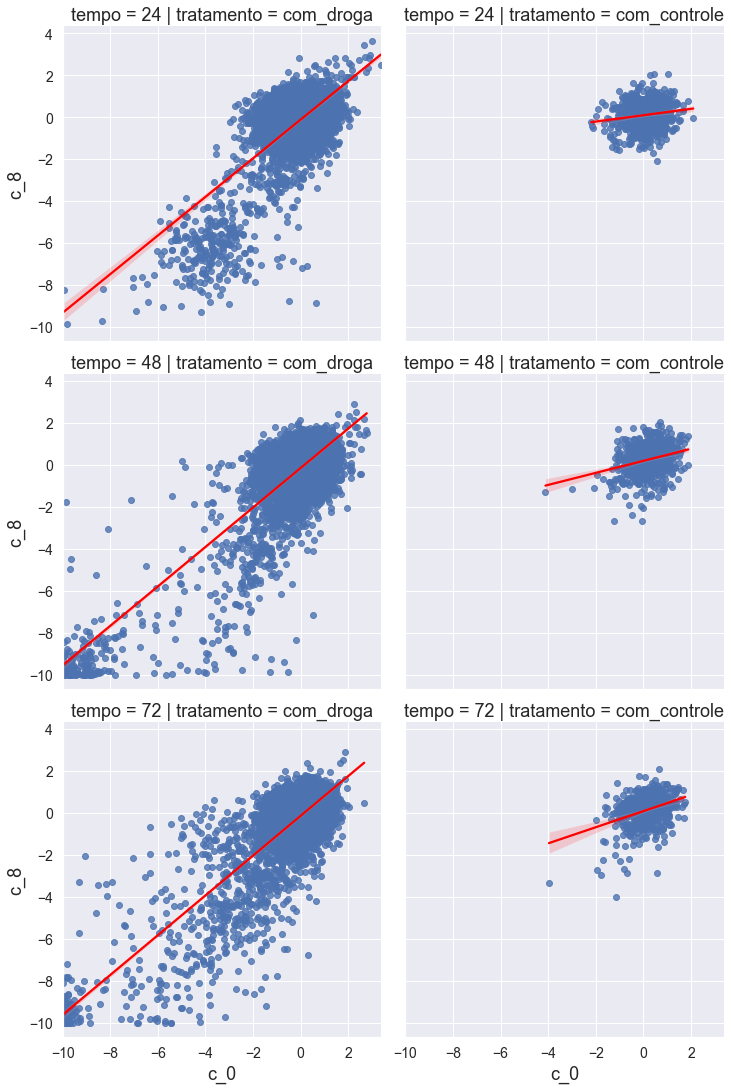

In [38]:
# Começar analisar a relação entre as celulas
sns.lmplot(data=dados, x="c_0", y="c_8", col="tratamento", row="tempo", line_kws={"color": "red"} )

# Alta correlação

<AxesSubplot:>

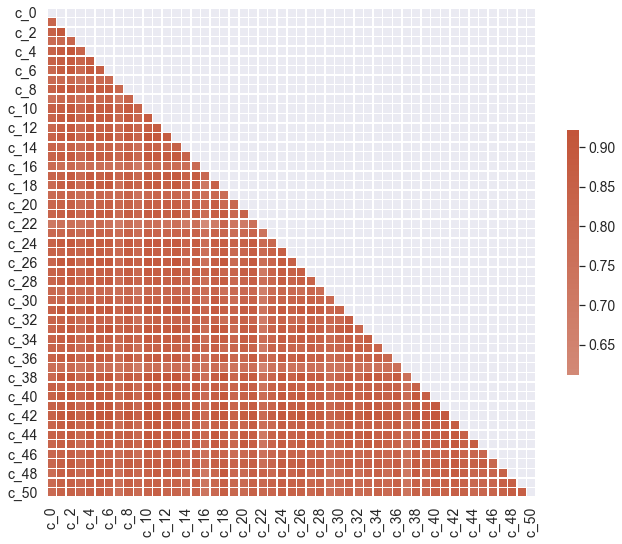

In [39]:
# Uma correlação alta é uma pista! mas não uma resposta
# Vamos analisar a correção das viabilidade celular (taxa de celulas que sobrevivem ao composto)

corr_celulas = dados.loc[:, "c_0":"c_50"].corr()
mask = np.triu(np.ones_like(corr_celulas, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr_celulas, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Pouca divergencia nas cores, representa alta relação positiva

## Aula 4 - Merge de dados e análise de resultados
Agora vamos analisar outra base de dados, fazer relacionamentos entre colunas e analisar os resultados de ativação ou não de mecanismos biologicos

In [40]:
dados_resultados = pd.read_csv("https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_resultados.csv?raw=true")

In [41]:
# As colunas representam o nome do mecanismo de ação da droga e o alvo, o sulfixo final determina a ação
# Exemplo: alpha_reductase_inhibitor: alpha_reductase (mecanismo biologico), inhibitor (ação da droga)
# O mecanismo biologico pode ser tanto do corpo humano quando de um vírus ou bactéria

dados_resultados.head(3)

# dados_resultados.shape

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,...,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Analisar os tipos de dados das colunas

In [42]:
# Possui apenas dois valores, zeros e uns
dados_resultados["acat_inhibitor"].unique()

# Grande maioria é de zeros (representa que o mecanismo de ação foi ou não ativado pela droga/composto)
# Os cientistas sabem disso porque a combinação das ativações dos genes (base anterior) representa estes mecanismos biologicos
# dados_resultados["5-alpha_reductase_inhibitor"].value_counts()
dados_resultados["acat_inhibitor"].value_counts()

0    23790
1       24
Name: acat_inhibitor, dtype: int64

#### Descobrir qual mecanismos de ação foi o mais ativado (soma nas colunas)
Como cada ativação estão com o valor 1 então podemos somar as colunas

In [43]:
# Selecionar apenas as colunas de mecanismos de ação

# Usando DROP (apenas colunas moa=mecanismos de ação)
# contagem_moa = dados_resultados.drop("id", axis=1).sum().sort_values(ascending=False)

# Usando SELECT_DTTYPES: apenas as colunas do tipo inteiro
contagem_moa = dados_resultados.select_dtypes("int64").sum().sort_values(ascending=False)
contagem_moa.head(20)

# Tipo 5: Analisar somente aqueles com sufixo inhibitor
contagem_moa.filter(like='inhibitor').head(5)

# Tipo 5: Analisar somente aqueles com sufixo inhibitor
contagem_moa.filter(like='_agonist').head(5)


adrenergic_receptor_agonist        270
glucocorticoid_receptor_agonist    266
serotonin_receptor_agonist         236
acetylcholine_receptor_agonist     190
estrogen_receptor_agonist          158
dtype: int64

#### Descobrir quanto cada resultado ativou de mecanismos de ação (soma nas linhas)

In [44]:
# axis igual a 1 na função soma faz a soma na horizontal - linhas (o padrão é na vertical - colunas)
dados_resultados["soma_ativado"] = dados_resultados.drop("id", axis=1).sum(axis=1)
# identifica se alguma coluna foi ativada
dados_resultados["ativo_moa"] = (dados_resultados["soma_ativado"] != 0)
dados_resultados.loc[:, ["id","soma_ativado","ativo_moa"]]

,id,soma_ativado,ativo_moa
0,id_000644bb2,1,True
1,id_000779bfc,0,False
2,id_000a6266a,3,True
3,id_0015fd391,0,False
4,id_001626bd3,1,True
...,...,...,...
23809,id_fffb1ceed,1,True
23810,id_fffb70c0c,1,True
23811,id_fffc1c3f4,0,False
23812,id_fffcb9e7c,1,True


#### MERGE: Fazer um join entre a base de dados dados e dados_resultado (baseado no id)

In [45]:
# faz o join entre as duas tabelas. parametro ON a chave das duas tabelas
# traz todas as colunas da tabela dados e apenas as colunas id, soma_ativado e ativo_moa da tabela dados_resultado
dados_combinados = pd.merge(dados, dados_resultados[["id", "soma_ativado", "ativo_moa"]], on="id")

# Com controle não ativa nada nos resultados
# Cria coluna nova para definir se é controle ou não True ou False
dados_combinados["eh_controle"] = (dados_combinados["tratamento"] == "com_controle")
dados_combinados["eh_24h"] = (dados_combinados["tempo"] == 24)
dados_combinados["eh_48h"] = (dados_combinados["tempo"] == 48)
dados_combinados["eh_72h"] = (dados_combinados["tempo"] == 72)

# dados_combinados.query("tempo == 24")
# dados_combinados.query("tratamento == 'com_controle'")

# Com controle nada foi ativado
dados_combinados.query("tratamento == 'com_controle'")["ativo_moa"].sum()

# Com droga mais de 14mil foi ativado
dados_combinados.query("tratamento == 'com_droga'")["ativo_moa"].sum()

# Experimentos que não ativaram nenhum mecanismo de ação False: 7501
dados_combinados.query("tratamento == 'com_droga'")["ativo_moa"].value_counts()

True     14447
False     7501
Name: ativo_moa, dtype: int64

<AxesSubplot:xlabel='composto', ylabel='g_0'>

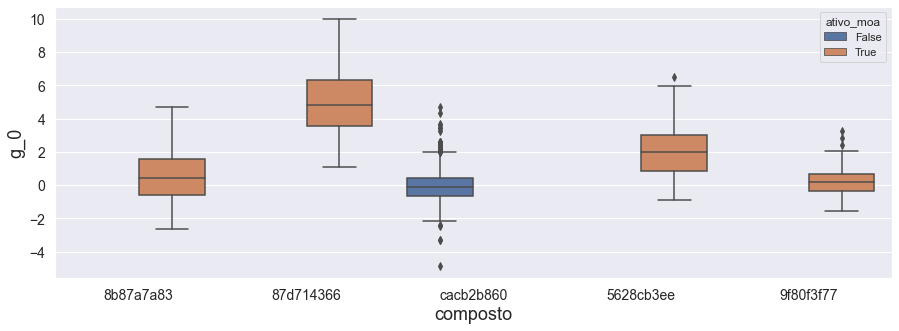

In [46]:
# apenas dos principais compostos
dados_combinados["composto"].value_counts()
compostos_principais = dados_combinados["composto"].value_counts().index[:5]
plt.figure(figsize=(15, 5))
sns.boxplot(data=dados_combinados.query("composto in @compostos_principais"), y="g_0", x="composto", hue="ativo_moa")

### Desafios:
- Encontrar o top 10 das ações (sufixo das colunas)
- Encontrar o top 10 das moa (tudo menos os prefixo)

### Aula 5 - ML

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Features: Selecionando apenas as colunas numéricas g_0... e c_0...
x = dados_combinados.select_dtypes("float64")

# Alvo: "ativo_moa". Se a assinatura do experimento ativou ou não um mecanismo de ação
y = dados_combinados["ativo_moa"]

# Separar treino e teste
# Separa uma parte dos dados para testar e avaliar a qualidade do modelo. A proporção teste 20% a 30%. Se tiver muitos dados pode ser menor
# random_state=<numero aleatorio> que faz a forma de construir o teste de forma aleatoria
# stratify=y garantir a proporção dos valores baseados no alvo  
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2, random_state=1000, stratify=y)

# Criar o modelo
modelo_rlogistica = LogisticRegression(max_iter=1000)
modelo_rlogistica.fit(x_treino, y_treino) 

# Verificar a qualidade do modelo (usar x_teste, y_teste)

# Calcula a acurácia diretamente com o metodo score
# modelo_rlogisticaa o conjunto de teste e calcula quantas predições ele acertou nos testes
modelo_rlogistica.score(x_teste, y_teste) # Resultado: 0.63. Será que é bom?


0.6325845055637204

In [48]:
# Comparar os resultados com modelos "tolos" dummy
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

modelo_dummy = DummyClassifier(strategy="most_frequent") # Esse dummy most_frequent chuta que todos os testes são iguais ao resultado mais frequente (no caso não ativar)

modelo_dummy.fit(x_treino, y_treino)

# Calcular a acuracia (de uma forma um pouco difente de no exemplo acima)
previsao_dummy = modelo_dummy.predict(x_teste)
accuracy_score(y_teste, previsao_dummy)

# Reultado: 0.60. Ou seja, o modelo ingenuo é muito próximo do modelo de regressao logistica


0.6067604450976275

#### Árvore de decisão

In [49]:
# Testar mais um modelo para ver se consegue um resultado melhor
from sklearn.tree import DecisionTreeClassifier

x = dados_combinados.select_dtypes("float64")
y = dados_combinados["ativo_moa"]
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2, random_state=1000, stratify=y)

modelo_tree = DecisionTreeClassifier(max_depth=)
modelo_tree.fit(x_treino, y_treino)
modelo_tree.score(x_teste, y_teste)

SyntaxError: invalid syntax (<ipython-input-49-af7944028995>, line 8)

In [ ]:
# Plotar a árvore
from sklearn import tree

fig, ax = plt.subplots(figsize=(15,10), facecolor='k')
tree.plot_tree(modelo_tree, 
               ax=ax,
               fontsize=10,
               rounded=True,
               filled=True,
               feature_names=x_treino.columns,
               class_names=["Ativado", "Não Ativado"]
               )
plt.show()

In [ ]:
# Incluir mais profundidade a arvore

x = dados_combinados.select_dtypes("float64")
y = dados_combinados["ativo_moa"]
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2, random_state=1000, stratify=y)

# Lista para armazenar os resultados
teste=[]
treino=[]

# Testar tamanhos diferentes de profundidade
for i in range(1, 15):
    modelo_tree = DecisionTreeClassifier(max_depth=i)
    modelo_tree.fit(x_treino, y_treino)
    teste.append(modelo_tree.score(x_teste, y_teste))
    treino.append(modelo_tree.score(x_treino, y_treino))

In [ ]:
sns.lineplot(x=range(1,15), y=teste, label="teste")
sns.lineplot(x=range(1,15), y=treino, label="treino")

In [ ]:
# transforma osdados_combinadosombinadostegoricos em colunas para cada ocorrencia
# exemplo, a coluna tratamento vai dar origem a duas colunas uma com o nome com_controle com valores zero e um, e outra com_tratamento com valores de zero e um
# pd.get_dummies(dados_combinados["tratamento"])

pd.get_dummies(dados_combinados, columns=["tratamento", "tempo", "dose"])


In [ ]:
# random forest
from sklearn.ensemble import RandomForestClassifier

# Removerndo id, coluna de soma e target. Deixando também as colunas categoricas
# Precisamos transformar as colunas categoricas em numeros
# Remover o composto porque ele não pode ser usado para treinar, porque ele deve ser generalizado para os novos compostos que o modelo tentará predizer
# Remover a soma_ativos porque se ele for usado para treinar a resposta que será prevista já estaria contida na propria feature de treinamento
x = dados_combinados.drop(["id", "composto", "soma_ativado", "ativo_moa"], axis=1)
x= pd.get_dummies(x, columns=["tratamento", "tempo", "dose"])
y = dados_combinados["ativo_moa"]
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2, random_state=1000, stratify=y)

modelo_randomforest = DecisionTreeClassifier()
modelo_randomforest.fit(x_treino, y_treino)
modelo_randomforest.score(x_teste, y_teste)